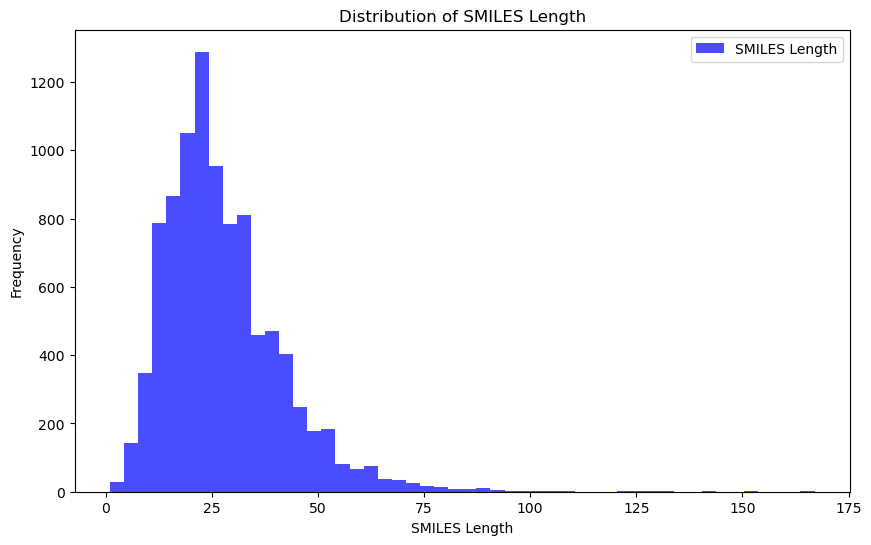

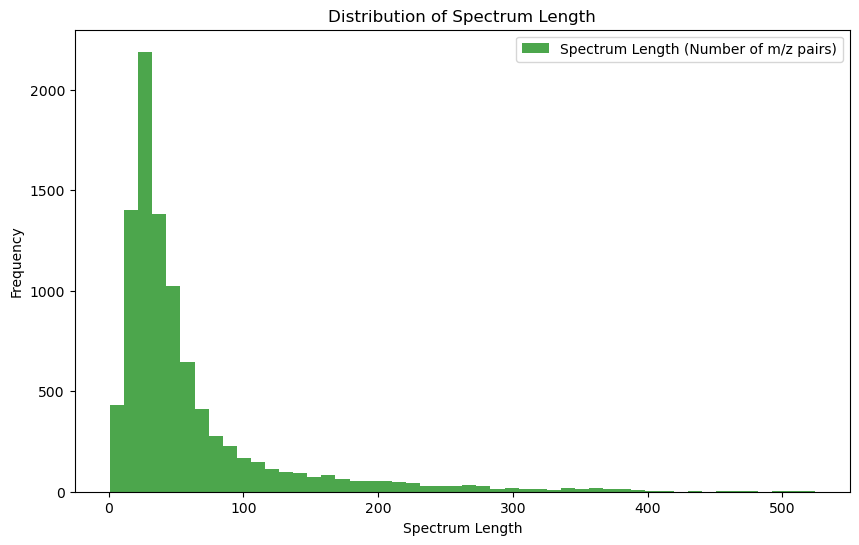

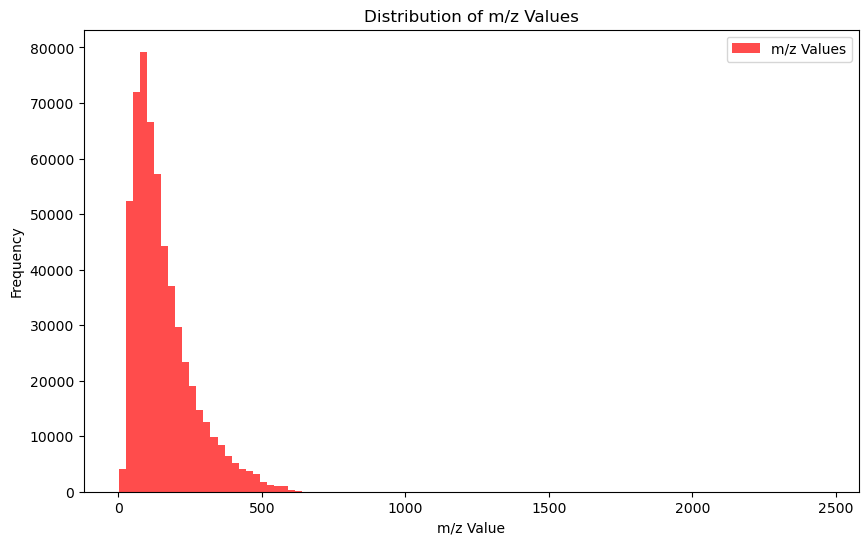

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_csv('gc_spec.csv')
df = df.dropna(subset=['SMILES', 'Spectrum'])

# smiles length
df['smiles_length'] = df['SMILES'].apply(len)

# spectrum length
def parse_spectrum(spectrum_str):
    pairs = spectrum_str.split()
    return len(pairs)

df['spectrum_length'] = df['Spectrum'].apply(parse_spectrum)

# m/z distribution
def extract_mz_values(spectrum_str):
    pairs = spectrum_str.split()
    mz_values = [float(pair.split(':')[0]) for pair in pairs]  # some m/z are floats
    return mz_values

df['mz_values'] = df['Spectrum'].apply(extract_mz_values)
all_mz_values = [mz for sublist in df['mz_values'] for mz in sublist]

# plot smiles length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['smiles_length'], bins=50, color='blue', alpha=0.7, label='SMILES Length')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.title('Distribution of SMILES Length')
plt.legend()
plt.show()

# plot spectrum length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['spectrum_length'], bins=50, color='green', alpha=0.7, label='Spectrum Length (Number of m/z pairs)')
plt.xlabel('Spectrum Length')
plt.ylabel('Frequency')
plt.title('Distribution of Spectrum Length')
plt.legend()
plt.show()

# plot m/z value distribution
plt.figure(figsize=(10, 6))
plt.hist(all_mz_values, bins=100, color='red', alpha=0.7, label='m/z Values')
plt.xlabel('m/z Value')
plt.ylabel('Frequency')
plt.title('Distribution of m/z Values')
plt.legend()
plt.show()
